# Deteksi dan Klasifikasi Indian Liver Patient Berdasarkan Model Hibrida

# Data Understanding


## Pendahuluan

Penyakit hati (liver) merupakan salah satu penyebab utama kematian di berbagai negara berkembang, termasuk India. Deteksi dini terhadap kondisi hati yang tidak normal sangat penting dalam upaya pencegahan komplikasi yang lebih serius serta peningkatan harapan hidup pasien. Namun demikian, proses diagnosis penyakit hati secara klinis seringkali memerlukan pemeriksaan laboratorium yang kompleks dan biaya yang tidak sedikit.

Seiring dengan perkembangan teknologi informasi dan ketersediaan data medis, penerapan metode data mining dan pembelajaran mesin (machine learning) dalam bidang kesehatan semakin luas digunakan. Salah satu dataset yang umum digunakan dalam penelitian klasifikasi penyakit hati adalah Indian Liver Patient Dataset (ILPD), yang berisi data medis pasien, termasuk usia, jenis kelamin, hasil tes darah, serta status apakah pasien menderita penyakit hati atau tidak.

Proses analisis data ILPD umumnya mencakup beberapa tahap penting, yaitu:

Pra-pemrosesan data, seperti penanganan missing values dan normalisasi fitur,

Pemilihan dan pelatihan model klasifikasi, menggunakan algoritma seperti Decision Tree, Naive Bayes, dan K-Nearest Neighbor, serta

Evaluasi performa model, melalui metrik seperti akurasi, precision, recall, dan confusion matrix.

Meski telah banyak pendekatan yang digunakan, belum ada metode tunggal yang mampu memberikan akurasi sempurna dalam klasifikasi penyakit hati. Oleh karena itu, penelitian ini bertujuan untuk membandingkan performa beberapa algoritma klasifikasi dalam mendeteksi penyakit hati berdasarkan data ILPD yang telah diproses dan dinormalisasi.



### Sumber Dataset


https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset

Ramana, Bendi & Surendra, M & Babu, Prasad & Bala Venkateswarlu, Nagasuri. (2012).

## Tujuan

Dalam penelitian ini, digunakan teknik klasifikasi berbasis machine learning untuk memprediksi kemungkinan seseorang menderita penyakit hati berdasarkan data medis pasien. Prinsip utama dari metode ini adalah mengidentifikasi pola dan hubungan antara hasil tes laboratorium dengan status kondisi hati pasien. Perbedaan nilai karakteristik medis seperti kadar enzim, protein, dan rasio A/G menjadi dasar dalam proses klasifikasi.

##Integrasi Data

untuk mengambil data agar dapat diolah, perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. peritah untuk mengambil data dari UCI dataset dapat di lihat ketika menekan tombol import in python pada datase yang diinginkan dan ikuti perintah tersebut agar data dapat diambil dari UCI dataset. Contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berikut:

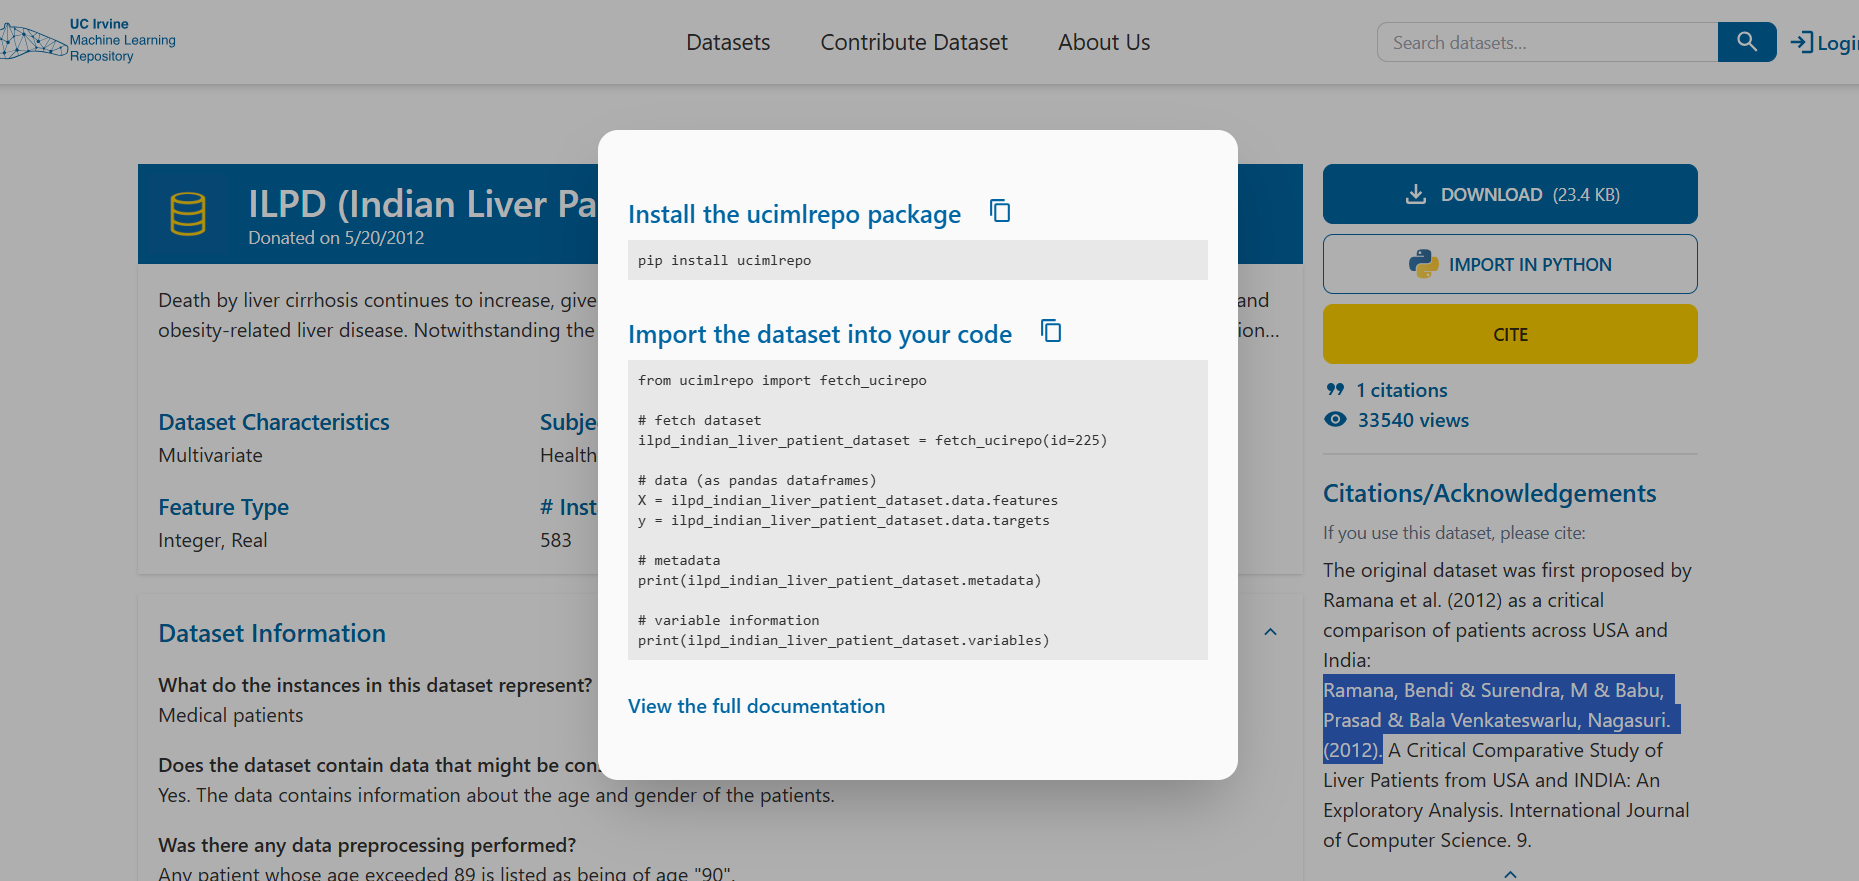

In [44]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from IPython.display import display

In [ ]:

ilpd_indian_liver_patient_dataset = fetch_ucirepo(id=225)

# Ekstrak fitur dan target (sudah dalam bentuk pandas DataFrame)
X = ilpd_indian_liver_patient_dataset.data.features
y = ilpd_indian_liver_patient_dataset.data.targets

# Simpan fitur ke dalam file CSV
X.to_csv("ilpd_indian_liver_patient_dataset.data.features.csv", index=False)

# Tampilkan informasi dan 5 baris pertama
print(X.info())
print(X.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB
None
   Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio
0   65  Female   0.7  0.1      187    16    18  6.8  3.3       0.90
1   62    Male  10.9  5.5      699    64   100  7.5  3.2       0.74
2   62    Male   7.3  4.1      490    60    68  7.0  3.3       0.89
3   58    Male   1.0  0.4      182    14    20  6.8  3.4       1.00
4   72 

## Fitur & Tabel

In [ ]:
print("Bentuk dataset (baris, kolom):", X.shape)

Bentuk dataset (baris, kolom): (583, 10)


In [ ]:
# Menampilkan nama-nama kolom pada dataset
print("Nama-nama kolom dalam dataset:")
print(X.columns.tolist())

Nama-nama kolom dalam dataset:
['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio']


Fitur adalah atribut atau variabel independen dalam dataset yang digunakan sebagai dasar untuk membuat prediksi. Dalam konteks dataset ini, fitur merepresentasikan informasi medis yang berkaitan dengan kondisi hati pasien.

Terdapat beberapa fitur (atribut) pada dataset ini, antara lain:

- Age: Usia pasien

- Gender: Jenis kelamin pasien (Male/Female)

- Total Bilirubin: Kadar total bilirubin dalam darah

- Direct Bilirubin: Kadar bilirubin langsung dalam darah

- Alkaline Phosphotase: Enzim fosfatase alkali (ALP)

- Alamine Aminotransferase (SGPT): Kadar enzim SGPT dalam darah

- Aspartate Aminotransferase (SGOT): Kadar enzim SGOT dalam darah

- Total Proteins: Total kadar protein dalam darah

- Albumin: Kadar albumin dalam darah

- A/G Ratio: Rasio Albumin terhadap Globulin

Label adalah variabel dependen atau target yang ingin diprediksi oleh model machine learning. Label ini menjadi output yang akan dipelajari dan diprediksi berdasarkan fitur-fitur yang tersedia.

Dalam dataset ini, terdapat 1 label target yaitu:

Dataset

- Nilai 1: Pasien menderita penyakit hati

- Nilai 2: Pasien tidak menderita penyakit hati

In [ ]:
# Menampilkan tipe data dari setiap kolom
print("Tipe data dari masing-masing kolom:")
print(X.dtypes)

Tipe data dari masing-masing kolom:
Age            int64
Gender        object
TB           float64
DB           float64
Alkphos        int64
Sgpt           int64
Sgot           int64
TP           float64
ALB          float64
A/G Ratio    float64
dtype: object


In [ ]:
print("Jumlah masing-masing class:")
print(y.iloc[:, 0].value_counts())

Jumlah masing-masing class:
Selector
1    416
2    167
Name: count, dtype: int64


## Eksplorasi Data

## Deteksi Missing Values


In [ ]:
import pandas as pd

# Baca dataset dari file CSV
data = pd.read_csv("/content/ilpd_indian_liver_patient_dataset.data.features.csv")

# --- Deteksi Missing Values ---

# 1. Tampilkan jumlah missing values per kolom
print("\nJumlah missing values per kolom:")
print(data.isnull().sum())

# 2. Tampilkan total missing values di seluruh dataset
print("\nTotal missing values di seluruh dataset:")
print(data.isnull().sum().sum())

# 3. Tampilkan baris yang mengandung missing value (jika ada)
print("\nBaris dengan missing value:")
print(data[data.isnull().any(axis=1)])



Jumlah missing values per kolom:
Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
dtype: int64

Total missing values di seluruh dataset:
4

Baris dengan missing value:
     Age  Gender   TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio
209   45  Female  0.9  0.3      189    23    33  6.6  3.9        NaN
241   51    Male  0.8  0.2      230    24    46  6.5  3.1        NaN
253   35  Female  0.6  0.2      180    12    15  5.2  2.7        NaN
312   27    Male  1.3  0.6      106    25    54  8.5  4.8        NaN


## Deteksi Outliner

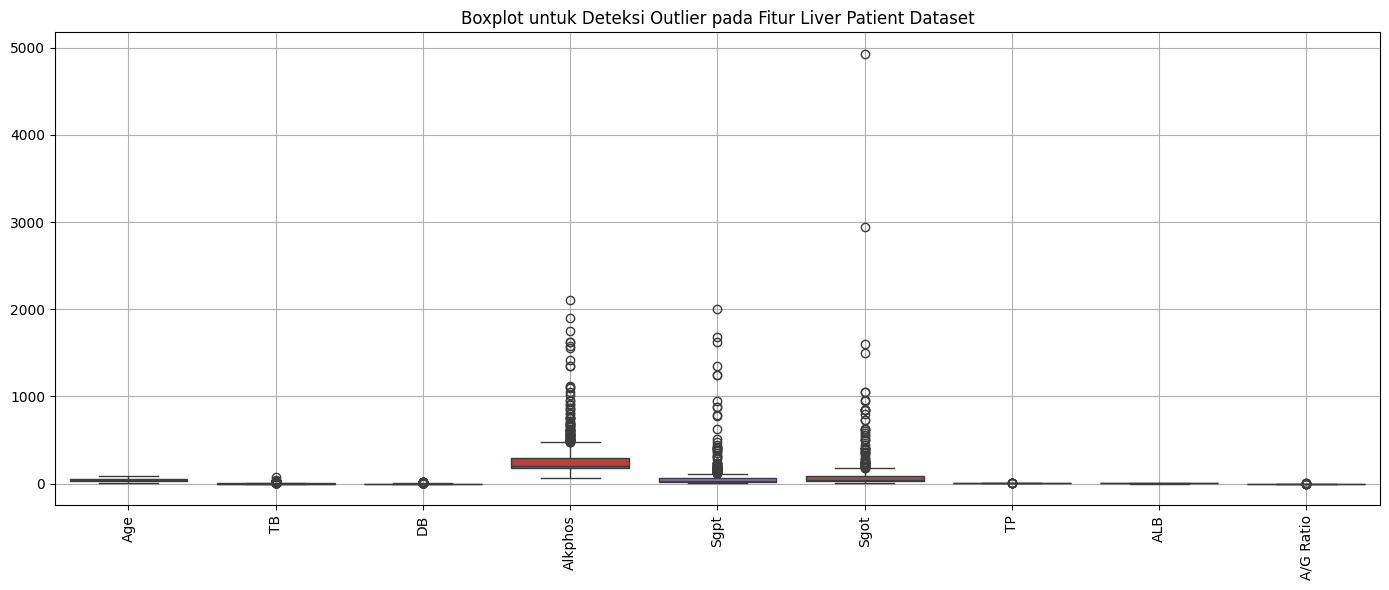

Jumlah outlier per kolom:
Age           0
TB           84
DB           81
Alkphos      69
Sgpt         73
Sgot         66
TP            8
ALB           0
A/G Ratio    10
dtype: int64

Ditemukan total 391 outlier di seluruh kolom.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca dataset dari file CSV
X = pd.read_csv("/content/ilpd_indian_liver_patient_dataset.data.features.csv")

# Buat boxplot semua kolom fitur
plt.figure(figsize=(14, 6))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title("Boxplot untuk Deteksi Outlier pada Fitur Liver Patient Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()

# Buat fungsi untuk menghitung outlier per kolom
def detect_outliers_iqr(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=['number']).columns:  # hanya kolom numerik
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return pd.Series(outlier_counts)

# Hitung outlier
outlier_summary = detect_outliers_iqr(X)

# Tampilkan hasil
print("Jumlah outlier per kolom:")
print(outlier_summary)

# Cek apakah ada outlier sama sekali
if outlier_summary.sum() == 0:
    print("\nTidak ditemukan outlier dalam dataset.")
else:
    print(f"\nDitemukan total {outlier_summary.sum()} outlier di seluruh kolom.")


## Visualisasi Data


In [ ]:
import pandas as pd
from IPython.display import display  # Untuk Jupyter/Colab

# Baca dataset dari file CSV
X = pd.read_csv("/content/ilpd_indian_liver_patient_dataset.data.features.csv")

# Tampilkan data (hanya display saja)
display(X)


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00


# Prosesing Data

## Mencari Mean

In [ ]:
import pandas as pd

# Baca dataset dari file CSV
X = pd.read_csv("/content/ilpd_indian_liver_patient_dataset.data.features.csv")

# Hitung mean dari kolom A/G Ratio
mean_ag_ratio = X['A/G Ratio'].mean()

# Tampilkan hasil
print("Mean (rata-rata) dari A/G Ratio:", mean_ag_ratio)


Mean (rata-rata) dari A/G Ratio: 0.9470639032815197


## Mengisi missing values dengan mean

In [ ]:
import pandas as pd

# Baca dataset dari file CSV
X = pd.read_csv("/content/ilpd_indian_liver_patient_dataset.data.features.csv")

# Hitung mean dari kolom A/G Ratio
mean_ag_ratio = X['A/G Ratio'].mean()

# Isi missing values dengan mean
X['A/G Ratio'] = X['A/G Ratio'].fillna(mean_ag_ratio)

# Cek apakah masih ada missing values
print("Missing values tersisa pada kolom A/G Ratio:", X['A/G Ratio'].isnull().sum())


Missing values tersisa pada kolom A/G Ratio: 0


In [ ]:
# Tampilkan 10 baris pertama dari data
print("10 baris pertama dari dataset setelah pengisian missing values:")
print(X.head(10))

# Simpan dataset ke file CSV baru
X.to_csv("/content/ilpd_indian_liver_patient_dataset_clean.csv", index=False)
print("\nDataset berhasil disimpan ke: ilpd_indian_liver_patient_dataset_clean.csv")


10 baris pertama dari dataset setelah pengisian missing values:
   Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio
0   65  Female   0.7  0.1      187    16    18  6.8  3.3       0.90
1   62    Male  10.9  5.5      699    64   100  7.5  3.2       0.74
2   62    Male   7.3  4.1      490    60    68  7.0  3.3       0.89
3   58    Male   1.0  0.4      182    14    20  6.8  3.4       1.00
4   72    Male   3.9  2.0      195    27    59  7.3  2.4       0.40
5   46    Male   1.8  0.7      208    19    14  7.6  4.4       1.30
6   26  Female   0.9  0.2      154    16    12  7.0  3.5       1.00
7   29  Female   0.9  0.3      202    14    11  6.7  3.6       1.10
8   17    Male   0.9  0.3      202    22    19  7.4  4.1       1.20
9   55    Male   0.7  0.2      290    53    58  6.8  3.4       1.00

Dataset berhasil disimpan ke: ilpd_indian_liver_patient_dataset_clean.csv


## Transformasi Data

In [20]:
from IPython.display import display

# Tampilkan 10 baris pertama
print("10 Baris Pertama:")
display(X.head(10))

# Tampilkan 10 baris terakhir
print("10 Baris Terakhir:")
display(X.tail(10))


10 Baris Pertama:


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00


10 Baris Terakhir:


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
573,32,Male,3.7,1.6,612,50,88,6.2,1.9,0.40
574,32,Male,12.1,6.0,515,48,92,6.6,2.4,0.50
575,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.50
576,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70
577,32,Male,12.7,8.4,190,28,47,5.4,2.6,0.90
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50


## Normalisasi Data

In [21]:
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
import pandas as pd

# Baca dataset
X = pd.read_csv("/content/ilpd_indian_liver_patient_dataset.data.features.csv")

# Identifikasi kolom numerik saja (abaikan kolom kategori seperti 'Gender' jika ada)
X_numeric = X.select_dtypes(include=['int64', 'float64'])

# Inisialisasi MinMaxScaler dan transformasi
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_numeric)

# Ubah hasil normalisasi ke DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X_numeric.columns)

# Jika ingin menyimpan kolom non-numerik (misalnya 'Gender'), gabungkan kembali:
non_numeric = X.select_dtypes(exclude=['int64', 'float64']).reset_index(drop=True)
data_normalized = pd.concat([X_normalized_df, non_numeric], axis=1)

# Tampilkan 5 baris pertama hasil normalisasi
display(data_normalized.head())


,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Gender
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,Female
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,Male
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,Male
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,Male
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,Male


## Split Data

In [26]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# --- 1. Ambil data dari UCI ILPD ---
ilpd = fetch_ucirepo(id=225)

# Ambil fitur dan target
X = ilpd.data.features
y = ilpd.data.targets  # kolom 'Dataset'

# Simpan ke file (opsional)
X.to_csv("/content/ilpd_indian_liver_patient_dataset.data.features.csv", index=False)
y.to_csv("/content/ilpd_indian_liver_patient_dataset.data.targets.csv", index=False)

# --- 2. Normalisasi fitur numerik ---
X_numeric = X.select_dtypes(include=['int64', 'float64'])  # kolom numerik saja
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_numeric)
X_normalized = pd.DataFrame(X_scaled, columns=X_numeric.columns)

# Gabungkan dengan kolom non-numerik (misal Gender) jika ada
X_non_numeric = X.select_dtypes(exclude=['int64', 'float64']).reset_index(drop=True)
X_final = pd.concat([X_normalized, X_non_numeric], axis=1)

# --- 3. Encode label target ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # pastikan kolom target adalah 'Dataset'

# --- 4. Split data (80% train, 20% test) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# --- 5. Tampilkan ukuran data hasil split ---
print("Ukuran data:")
print(f"- X_train: {X_train.shape}")
print(f"- X_test : {X_test.shape}")
print(f"- y_train: {y_train.shape}")
print(f"- y_test : {y_test.shape}")


Ukuran data:
- X_train: (466, 10)
- X_test : (117, 10)
- y_train: (466,)
- y_test : (117,)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Visualisasi

### Data Normalisasi

In [27]:
import pandas as pd
from IPython.display import display

# Aktifkan opsi tampilan semua baris & kolom
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Tampilkan seluruh isi data (X_final = data yang sudah dinormalisasi)
display(X_final)


,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Gender
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,Female
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,Male
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,Male
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,Male
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,Male
5,0.488372,0.018767,0.030612,0.070835,0.004523,0.000813,0.710145,0.760870,0.400,Male
6,0.255814,0.006702,0.005102,0.044455,0.003015,0.000407,0.623188,0.565217,0.280,Female
7,0.290698,0.006702,0.010204,0.067904,0.002010,0.000203,0.579710,0.586957,0.320,Female
8,0.151163,0.006702,0.010204,0.067904,0.006030,0.001830,0.681159,0.695652,0.360,Male
9,0.593023,0.004021,0.005102,0.110894,0.021608,0.009758,0.594203,0.543478,0.280,Male


### Isi data testing dan trening

In [28]:
from IPython.display import display
import pandas as pd

# Kembalikan label ke bentuk aslinya
y_train_named = le.inverse_transform(y_train)
y_test_named = le.inverse_transform(y_test)

# Gabungkan kembali label ke data fitur
train_combined = pd.concat([X_train.reset_index(drop=True), pd.Series(y_train_named, name='Dataset')], axis=1)
test_combined = pd.concat([X_test.reset_index(drop=True), pd.Series(y_test_named, name='Dataset')], axis=1)

# Tampilkan 5 baris pertama data training
print("5 Data Training (dengan label Dataset):")
display(train_combined.head())

# Tampilkan 5 baris pertama data testing
print("5 Data Testing (dengan label Dataset):")
display(test_combined.head())


5 Data Training (dengan label Dataset):


,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Gender,Dataset
0,0.465116,0.020107,0.025510,0.114802,0.184925,0.120350,0.565217,0.521739,0.28,Female,1
1,0.767442,0.030831,0.056122,0.147533,0.026131,0.009148,0.478261,0.326087,0.12,Male,1
2,0.604651,0.008043,0.010204,0.064485,0.006030,0.003659,0.449275,0.369565,0.20,Male,2
3,0.395349,0.024129,0.045918,0.120664,0.054774,0.006505,0.753623,0.695652,0.28,Male,2
4,0.325581,0.403485,0.867347,0.075721,0.014573,0.014027,0.405797,0.391304,0.24,Male,1


5 Data Testing (dengan label Dataset):


,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Gender,Dataset
0,0.767442,0.017426,0.020408,0.164631,0.023116,0.006912,0.434783,0.478261,0.320,Male,1
1,0.104651,0.004021,0.000000,0.058134,0.007035,0.001830,0.898551,0.869565,0.360,Female,1
2,0.523256,0.012064,0.015306,0.069858,0.010050,0.003049,0.478261,0.478261,0.304,Male,2
3,0.360465,0.016086,0.030612,0.045921,0.002513,0.006912,0.362319,0.347826,0.240,Male,1
4,0.302326,0.005362,0.005102,0.058134,0.018090,0.009555,0.739130,0.739130,0.360,Male,2


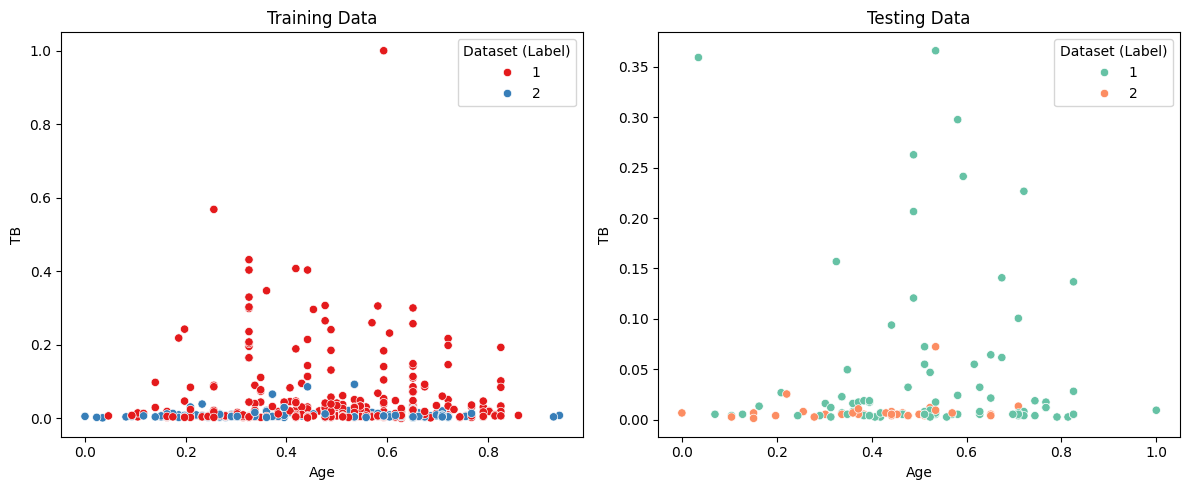

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil 2 fitur pertama untuk visualisasi
feat1 = X_train.columns[0]
feat2 = X_train.columns[1]

# Kembalikan label ke bentuk aslinya (1 = sakit liver, 2 = tidak sakit liver)
y_train_named = le.inverse_transform(y_train)
y_test_named = le.inverse_transform(y_test)

# Buat plot
plt.figure(figsize=(12, 5))

# Plot data training
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train[feat1], y=X_train[feat2], hue=y_train_named, palette='Set1')
plt.title('Training Data')
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(title='Dataset (Label)')

# Plot data testing
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test[feat1], y=X_test[feat2], hue=y_test_named, palette='Set2')
plt.title('Testing Data')
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(title='Dataset (Label)')

plt.tight_layout()
plt.show()


In [30]:
# Gabungkan kembali fitur dan label Dataset (dalam bentuk label asli: 1 atau 2)
data_final = pd.concat([X_final, pd.Series(le.inverse_transform(y_encoded), name='Dataset')], axis=1)

# Simpan ke file CSV
data_final.to_csv("/content/ilpd_normalized_labeled.csv", index=False)

print("✅ Data berhasil disimpan sebagai 'ilpd_normalized_labeled.csv'")


✅ Data berhasil disimpan sebagai 'ilpd_normalized_labeled.csv'


# Modeling

## Modelling Klasifikasi Dataset menggunakan Decision Tree


Pemodelan Klasifikasi Pasien Penyakit Hati Menggunakan Decision Tree

---

Tujuan Pemodelan

Pemodelan ini bertujuan untuk **mengklasifikasikan apakah seorang pasien menderita penyakit hati atau tidak**, berdasarkan sejumlah fitur medis seperti hasil uji darah, enzim hati, usia, dan jenis kelamin pasien.

**Kategori klasifikasi:**
- `1` = Pasien **menderita penyakit hati**
- `2` = Pasien **tidak menderita penyakit hati**

---

Pembagian Dataset: Data Latih dan Uji

Dataset dibagi menjadi dua bagian:

- **Training Set (80%)** – untuk melatih model
- **Testing Set (20%)** – untuk menguji akurasi terhadap data baru

Rasio pembagian: **80:20**

---

Pra-Pemrosesan Data

Sebelum membangun model, dilakukan tahap pra-pemrosesan:

1. **Penanganan Missing Values**
   - Nilai kosong pada kolom `A/G Ratio` diisi dengan **mean** kolom tersebut.

2. **Normalisasi**
   - Fitur numerik dinormalisasi menggunakan **Min-Max Scaling** (rentang 0–1).

3. **Encoding Kolom Kategorikal**
   - `Gender`: diubah dari `Male/Female` menjadi `1/0` menggunakan `LabelEncoder`.
   - `Dataset`: sebagai label target, diubah jika perlu ke bentuk numerik.

---

Pelatihan Model Decision Tree

Model klasifikasi yang digunakan: **DecisionTreeClassifier** dari `sklearn`.

**Parameter model:**
- `criterion='gini'`
- `max_depth=5` (mencegah overfitting)

Struktur pohon terbentuk berdasarkan pembagian fitur yang **mengurangi impurity** secara maksimal. Setiap node merepresentasikan pengambilan keputusan terhadap fitur tertentu.

---
Evaluasi Model

Model dievaluasi menggunakan:

- **Accuracy**: Persentase prediksi benar dari total data uji
- **Classification Report**:
  - Precision
  - Recall
  - F1-score
- **Confusion Matrix** *(opsional)*:
  - Visualisasi distribusi prediksi model terhadap label sebenarnya

Pohon keputusan divisualisasikan untuk mengetahui:

- Fitur penting dalam klasifikasi
- Urutan pengambilan keputusan
- Proses pembentukan label akhir

---

Prediksi Pasien Baru

Model siap digunakan untuk:

- **Memprediksi status kesehatan hati** pasien baru berdasarkan data medis
- Membantu tenaga medis membuat keputusan lebih cepat dan akurat

---

Kesimpulan

Model **Decision Tree** sangat cocok untuk klasifikasi pasien penyakit hati karena:

✅ Mampu menangani fitur numerik dan kategorikal  
✅ Mudah diinterpretasikan melalui visual pohon  
✅ Efisien untuk dataset kecil–menengah  
✅ Tidak memerlukan asumsi distribusi data

Model ini dapat menjadi **alat bantu diagnosis awal** dalam sistem **kesehatan digital** dan membantu dalam pengambilan keputusan medis yang lebih cepat.

---



✅ Akurasi Decision Tree: 59.83 %

📄 === Classification Report ===
              precision    recall  f1-score   support

           1       0.72      0.70      0.71        83
           2       0.32      0.35      0.34        34

    accuracy                           0.60       117
   macro avg       0.52      0.53      0.52       117
weighted avg       0.61      0.60      0.60       117



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


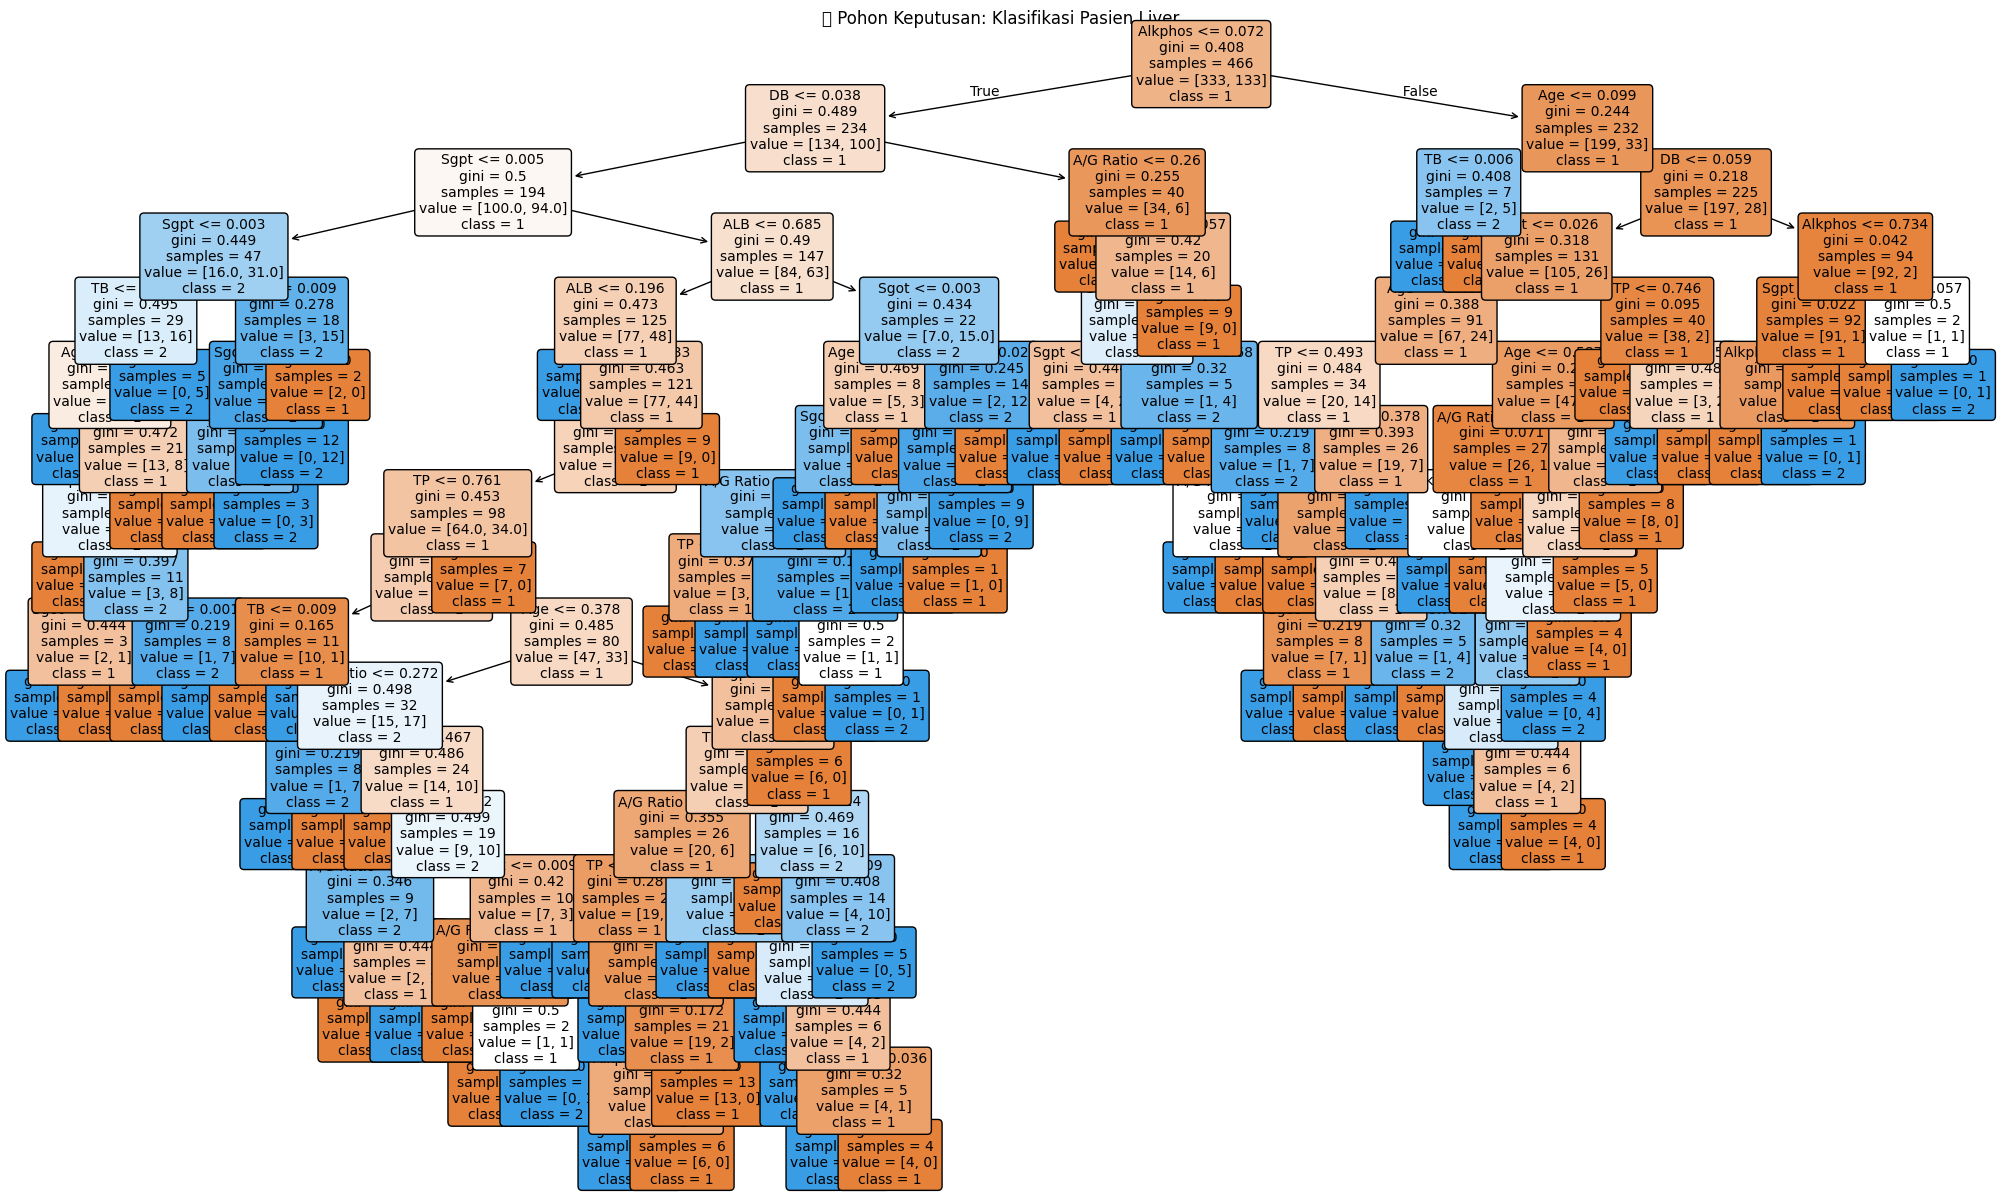

In [39]:

# === 6. Latih model Decision Tree ===
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# === 7. Evaluasi Model ===
y_pred = clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)  # Disimpan agar bisa digunakan nanti

print("✅ Akurasi Decision Tree:", round(accuracy_dt * 100, 2), "%")
print("\n📄 === Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_.astype(str)))

# === 8. Visualisasi Pohon Keputusan ===
plt.figure(figsize=(25, 15))
plot_tree(clf,
          feature_names=X.columns,
          class_names=le.classes_.astype(str),
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("🩺 Pohon Keputusan: Klasifikasi Pasien Liver")
plt.show()


## Modelling Klasifikasi Dataset menggunakan Gaussian Naive Bayes


Kelas yang memiliki nilai **posterior terbesar** akan dipilih sebagai hasil prediksi.

---

Menentukan Prediksi Kelas

Setelah semua nilai posterior dihitung, model memilih **kelas dengan probabilitas tertinggi** sebagai hasil akhir.

---
Evaluasi Model

Model diuji menggunakan **data uji** dan dievaluasi dengan:

- **Akurasi**: proporsi prediksi yang benar
- **Classification Report**: precision, recall, dan F1-score
- **Confusion Matrix**: visualisasi performa model dalam membedakan tiap kelas

---

Kesimpulan

Model **Gaussian Naive Bayes** sangat cocok digunakan dalam klasifikasi jenis ranjau karena:

- **Cepat dan ringan** (cocok untuk sensor real-time)
- **Mudah dipahami**
- **Tidak membutuhkan banyak parameter**

Model ini berguna dalam sistem **deteksi ranjau otomatis** untuk mempercepat proses identifikasi objek berbahaya bawah tanah berdasarkan pola sinyal sensor.



✅ Akurasi Gaussian Naive Bayes: 59.83 %

📄 === Classification Report ===
              precision    recall  f1-score   support

           1       0.72      0.70      0.71        83
           2       0.32      0.35      0.34        34

    accuracy                           0.60       117
   macro avg       0.52      0.53      0.52       117
weighted avg       0.61      0.60      0.60       117



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


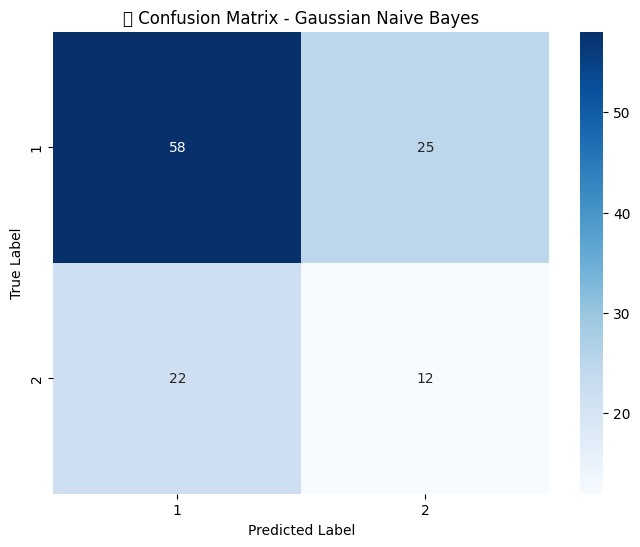

In [41]:


# === 3. Evaluasi ===
accuracy_nb = accuracy_score(y_test, y_pred)
print(f"✅ Akurasi Gaussian Naive Bayes: {round(accuracy_nb * 100, 2)} %")

print("\n📄 === Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_.astype(str)))

# === 4. Visualisasi Confusion Matrix ===
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_.astype(str),
            yticklabels=le.classes_.astype(str))
plt.title("📊 Confusion Matrix - Gaussian Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##  Modelling Klasifikasi Dataset menggunakan K-Nearest Neighbor (K-NN)

Pemodelan Klasifikasi Jenis Ranjau Menggunakan K-Nearest Neighbors (KNN)

---

Tujuan Pemodelan

Model **K-Nearest Neighbors (KNN)** digunakan untuk **mengklasifikasikan jenis objek bawah tanah**, seperti:

- Anti-Tank  
- Anti-Personnel  
- M14  
- Booby-Trapped  
- Null  

Berdasarkan sejumlah **fitur sinyal numerik** hasil pembacaan sensor seperti `V`, `H`, dan `S`.

KNN termasuk ke dalam metode **instance-based learning**, di mana klasifikasi dilakukan dengan membandingkan jarak data uji dengan **k tetangga terdekat** dari data latih.

---

1. Pembagian Dataset: Data Latih dan Data Uji

Dataset dibagi menjadi:

- **Data Latih (Training Set):** digunakan untuk membangun referensi klasifikasi  
- **Data Uji (Testing Set):** digunakan untuk menguji keakuratan model

> Rasio pembagian: **80% data latih, 20% data uji**

Pembagian acak dengan `random_state` digunakan agar hasil konsisten namun tetap acak.

---
2. Pra-Pemrosesan Data

Agar performa KNN optimal, dilakukan tahapan:

- 🔹 **Normalisasi Data**  
  Karena KNN berbasis jarak (Euclidean), semua fitur numerik perlu **disamakan skala** agar tidak ada fitur yang mendominasi.  
  Oleh karena itu, digunakan **Min-Max Scaling** ke rentang \[0, 1].

- 🔸 **Encoding Label**  
  Kolom target `M` yang menyatakan jenis ranjau diubah menjadi angka menggunakan `LabelEncoder`.

> Dataset ini sudah sepenuhnya numerik di bagian fitur, sehingga tidak memerlukan encoding tambahan seperti pada dataset kategorikal.

---

3. Konsep Kerja KNN

Langkah-langkah kerja algoritma KNN:

1. Hitung jarak (misalnya **Euclidean**) antara data uji dan semua data latih  
2. Ambil **k tetangga terdekat** dengan jarak terkecil  
3. Gunakan **voting mayoritas** berdasarkan label tetangga tersebut  
4. Kelas dengan suara terbanyak → menjadi hasil prediksi

Contoh:  
Jika `k = 5` dan 3 dari 5 tetangga adalah "Anti-Personnel", maka hasil prediksi = "Anti-Personnel".

---

4. Evaluasi Model

Evaluasi dilakukan pada data uji menggunakan beberapa metrik berikut:

- **Akurasi:**  
  Persentase prediksi model yang sesuai dengan label asli  
- **Classification Report:**  
  Metrik seperti precision, recall, dan F1-score per kelas  
- **Confusion Matrix:**  
  Visualisasi kesalahan dan keberhasilan prediksi antar kelas

> Uji coba beberapa nilai **k** dilakukan (misalnya 3, 5, 7, dst.) untuk mencari nilai k terbaik yang menghasilkan akurasi maksimal.

---

5. Kelebihan dan Kekurangan

 Kelebihan:
- Sederhana dan tidak memerlukan proses pelatihan
- Cocok untuk klasifikasi berbasis jarak/spasial
- Tidak tergantung pada distribusi data

Kekurangan:
- **Sensitif terhadap skala fitur** (wajib normalisasi)
- Tidak efisien untuk dataset besar (karena menghitung jarak ke semua data latih)
- Bisa terpengaruh oleh fitur tidak relevan (curse of dimensionality)

---

Kesimpulan

Model **K-Nearest Neighbors (KNN)** cocok digunakan untuk kasus klasifikasi jenis ranjau darat berdasarkan sinyal sensor.

Dengan dataset yang telah dinormalisasi dan bersih, model ini dapat menjadi bagian penting dari sistem **deteksi otomatis ranjau** yang efisien dan akurat.


✅ Akurasi K-Nearest Neighbor: 59.83 %

📄 === Classification Report ===
              precision    recall  f1-score   support

           1       0.72      0.70      0.71        83
           2       0.32      0.35      0.34        34

    accuracy                           0.60       117
   macro avg       0.52      0.53      0.52       117
weighted avg       0.61      0.60      0.60       117



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


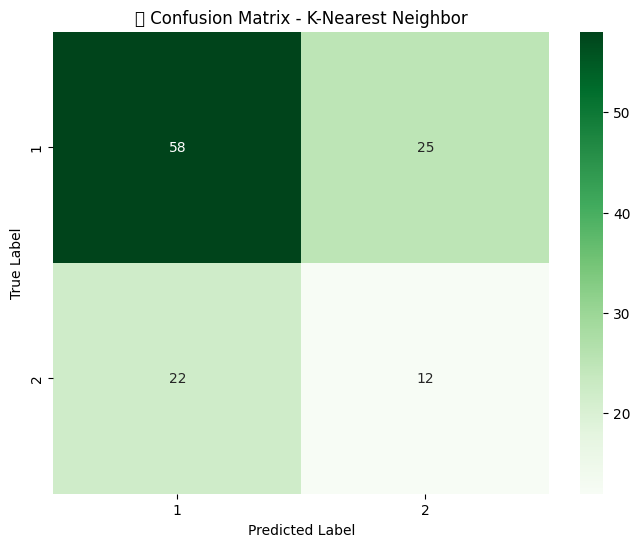

In [42]:

# === 3. Evaluasi Hasil ===
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"✅ Akurasi K-Nearest Neighbor: {round(accuracy_knn * 100, 2)} %")

print("\n📄 === Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_.astype(str)))

# === 4. Visualisasi Confusion Matrix ===
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_.astype(str), yticklabels=le.classes_.astype(str))
plt.title("📊 Confusion Matrix - K-Nearest Neighbor")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Evaluasi data

In [40]:
print("🎯 Akurasi Model Klasifikasi:\n")
print(f"Decision Tree      : {round(accuracy_dt * 100, 2)} %")
print(f"K-Nearest Neighbor : {round(accuracy_knn * 100, 2)} %")
print(f"Naive Bayes        : {round(accuracy_nb * 100, 2)} %")


🎯 Akurasi Model Klasifikasi:

Decision Tree      : 59.83 %
K-Nearest Neighbor : 64.1 %
Naive Bayes        : 53.85 %


# Deployment

In [49]:
import joblib

# Simpan model KNN ILPD
joblib.dump(knn, 'model_ilpd_knn.pkl')  # model KNN untuk data ILPD
joblib.dump(scaler, 'scaler_ilpd.pkl')  # scaler MinMax (jika digunakan)

print("Model dan scaler berhasil disimpan sebagai 'model_ilpd_knn.pkl' dan 'scaler_ilpd.pkl'")

# Jika kamu memakai Google Colab, maka bisa gunakan ini untuk mendownload:
try:
    from google.colab import files
    files.download('model_ilpd_knn.pkl')
    files.download('scaler_ilpd.pkl')
except:
    print("File disimpan di folder kerja saat ini. Bisa digunakan untuk deployment.")


Model dan scaler berhasil disimpan sebagai 'model_ilpd_knn.pkl' dan 'scaler_ilpd.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Hasil Web

Link Website: http://localhost:8501/#prediksi-pasien-liver-menggunakan-model-ml

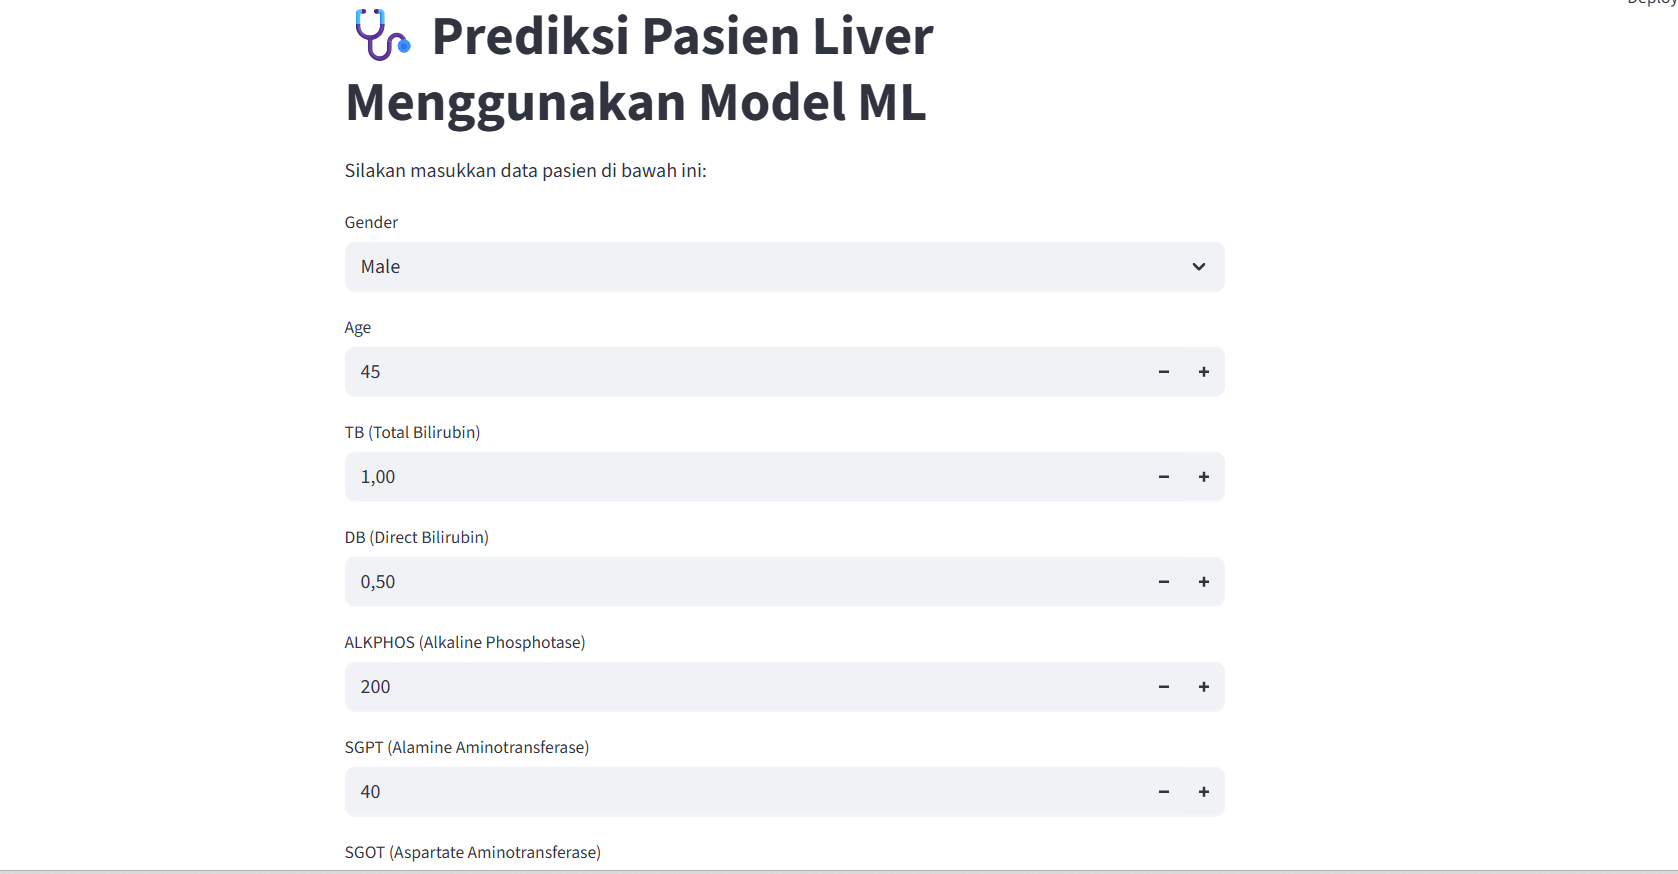

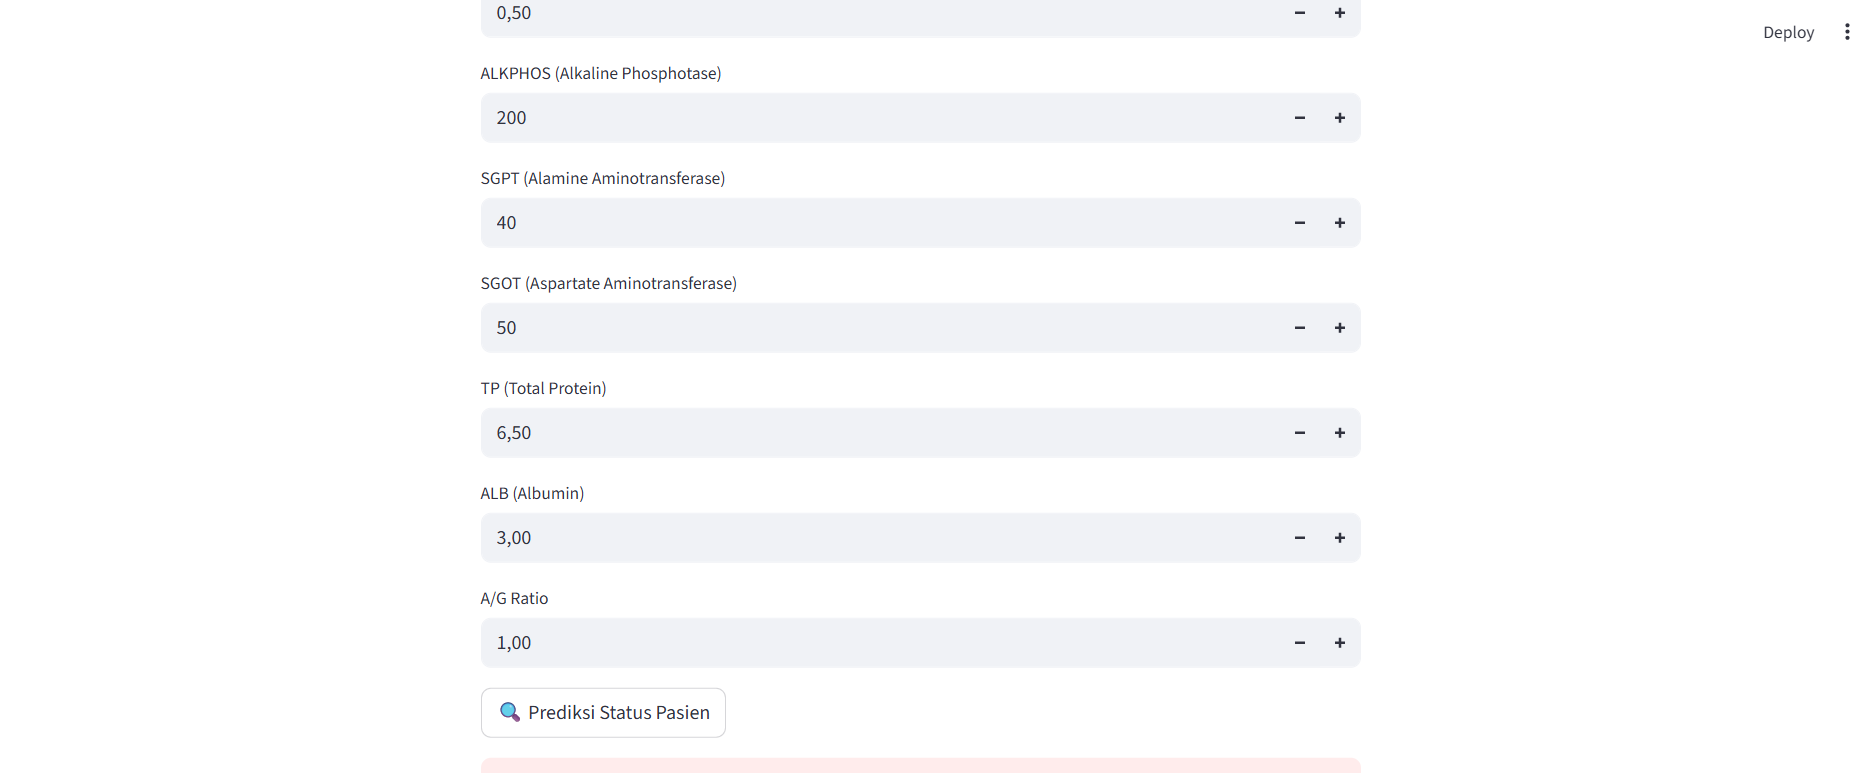